# Exploratory Data Analysis (EDA)

In [4]:
!pip install mlflow

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import mlflow
import mlflow.sklearn
import joblib

In [6]:
df = pd.read_csv('/content/Heart Prediction Quantum Dataset.csv')

In [7]:
df.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [8]:
df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


In [9]:
df.shape

(500, 7)

In [10]:
df.dtypes

,0
Age,int64
Gender,int64
BloodPressure,int64
Cholesterol,int64
HeartRate,int64
QuantumPatternFeature,float64
HeartDisease,int64


In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
BloodPressure,0
Cholesterol,0
HeartRate,0
QuantumPatternFeature,0
HeartDisease,0


<Figure size 1000x1000 with 0 Axes>

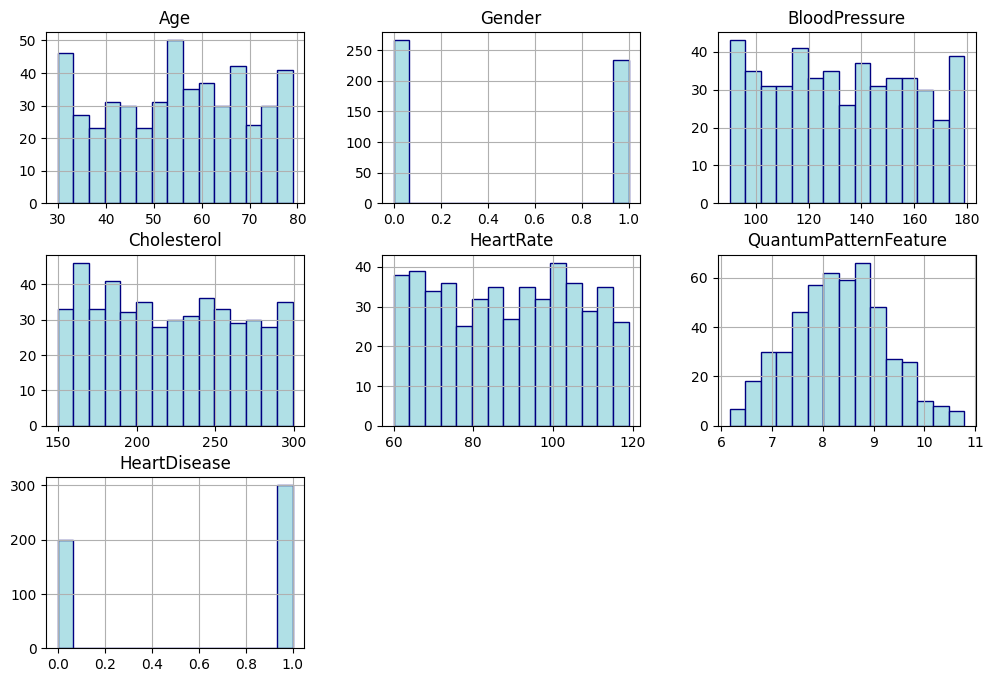

In [12]:
plt.figure(figsize=(10,10))
df.hist(bins=15, figsize=(12, 8), layout=(3, 3), color="powderblue", edgecolor="navy")
plt.title("Features")
plt.show()

Text(0.5, 1.0, 'Heart Disease Distribution (Target)')

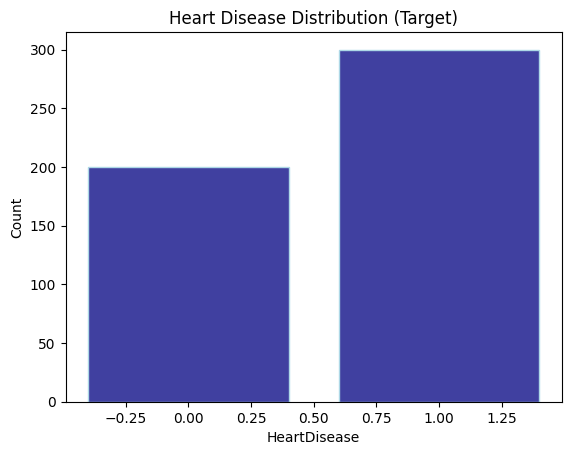

In [13]:
#Target Outcomes
sns.histplot(data=df, x='HeartDisease', discrete=True, shrink=0.8, color='navy',edgecolor='lightblue' )
plt.title("Heart Disease Distribution (Target)")

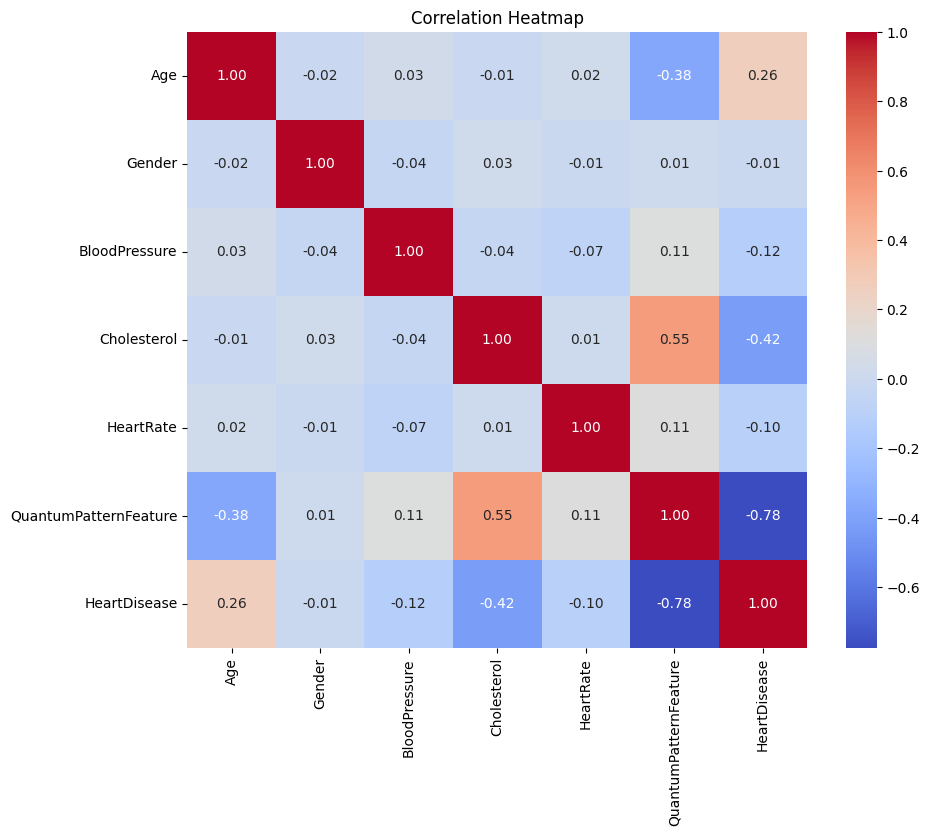

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
target_mean = df.groupby("HeartDisease").mean()
print("\nAverage Feature Values by having or not having a Heart Disease:")
target_mean


Average Feature Values by having or not having a Heart Disease:


,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
HeartDisease,,,,,,
0,50.34,0.475000,136.655000,244.230000,90.955000,9.189605
1,57.88,0.463333,130.353333,206.346667,87.306667,7.735942


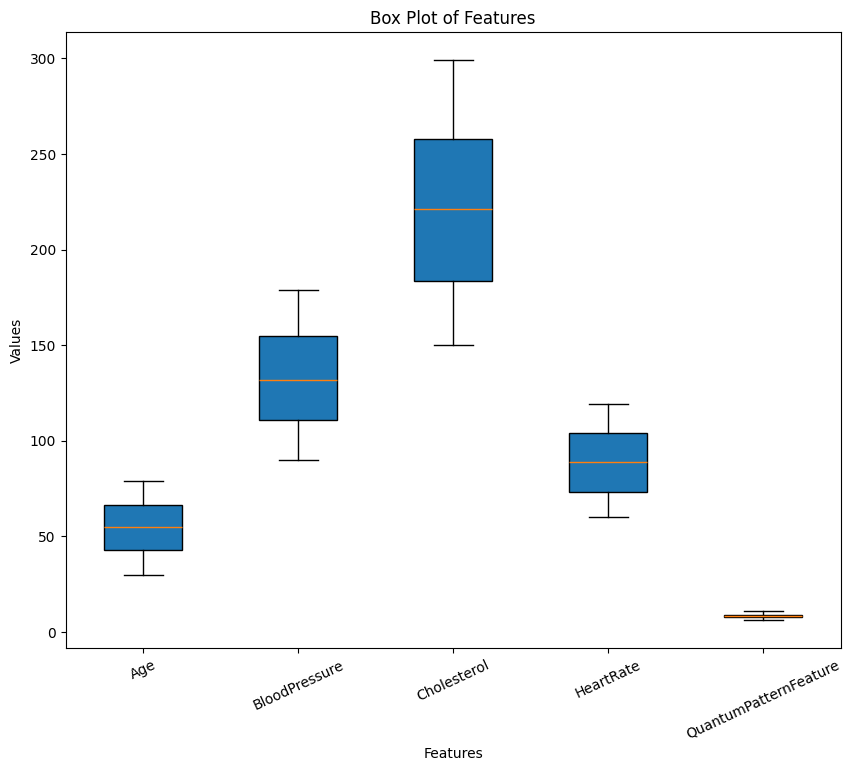

In [16]:
plt.figure(figsize=(10, 8))
features = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']
plt.boxplot(df[features], patch_artist=True)
plt.xticks(ticks = range(1, len(features) + 1), labels = features,rotation=25)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

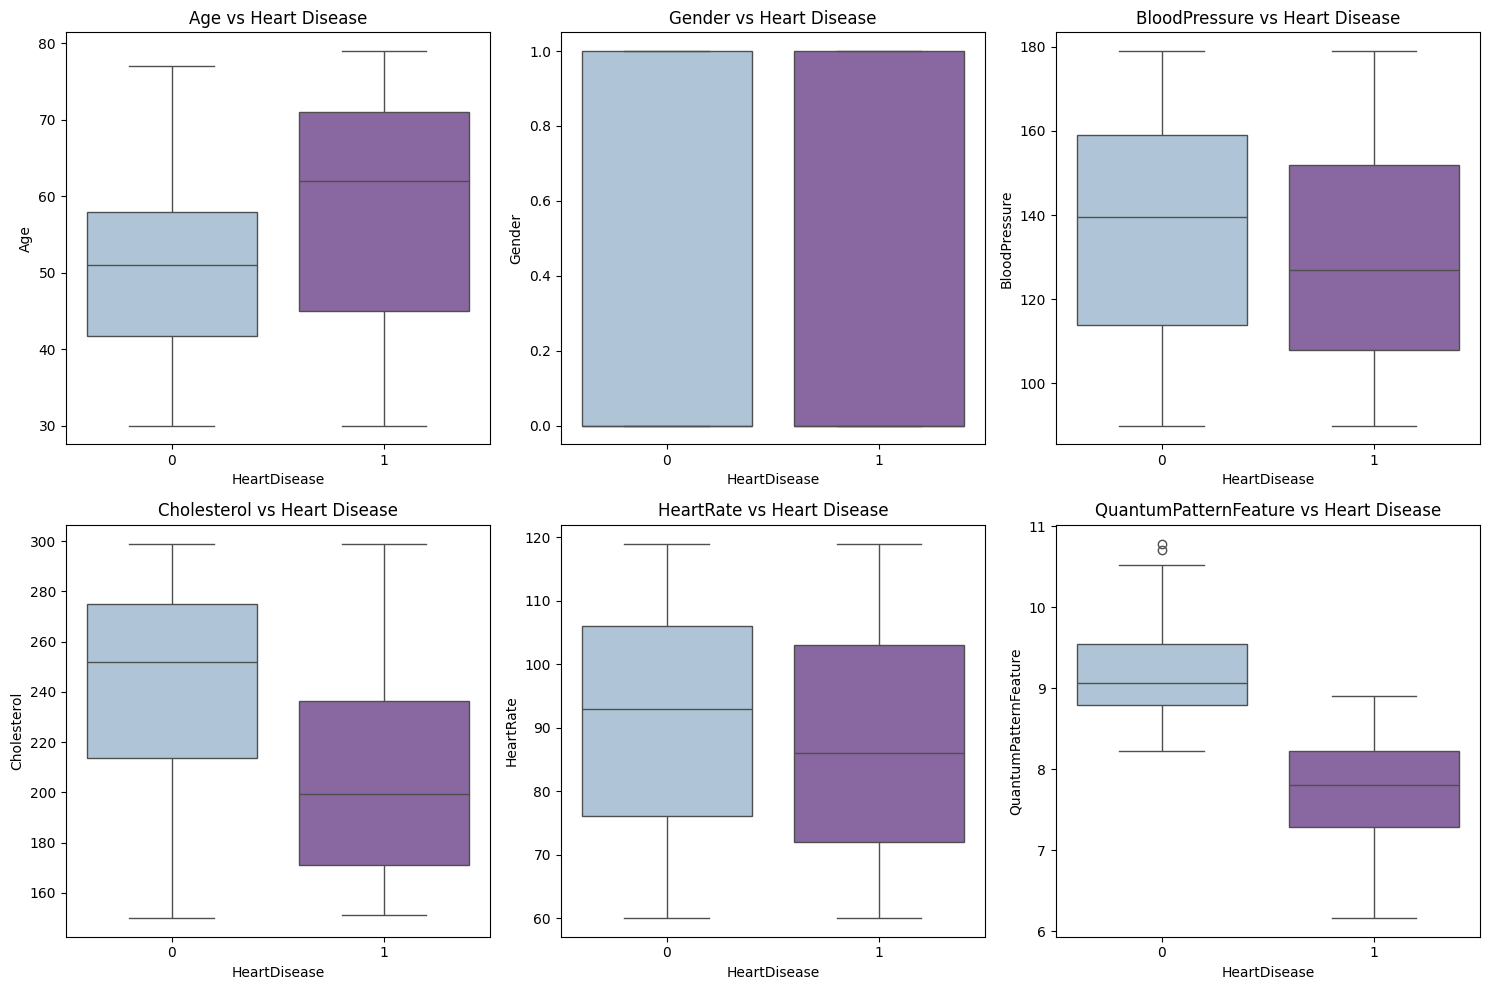

In [17]:
features = ["Age", 'Gender',"BloodPressure", "Cholesterol", "HeartRate", "QuantumPatternFeature"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="HeartDisease", y=feature, hue="HeartDisease", palette="BuPu", legend=False)
    plt.title(f"{feature} vs Heart Disease")

plt.tight_layout()
plt.show()

# Feature Engineering

In [18]:
negative_cols = [col for col in df.columns if (df[col] < 0).any()]
negative_cols

[]

In [19]:
sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select='auto', direction='forward', scoring='accuracy', cv=10)
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

sfs.fit(X, y)

selected_feature = sfs.get_support()
selected_features = list(X.columns[selected_feature])

print("Original Features:", list(X.columns))
print("Selected Features:", selected_features)

Original Features: ['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']
Selected Features: ['Gender', 'BloodPressure', 'QuantumPatternFeature']


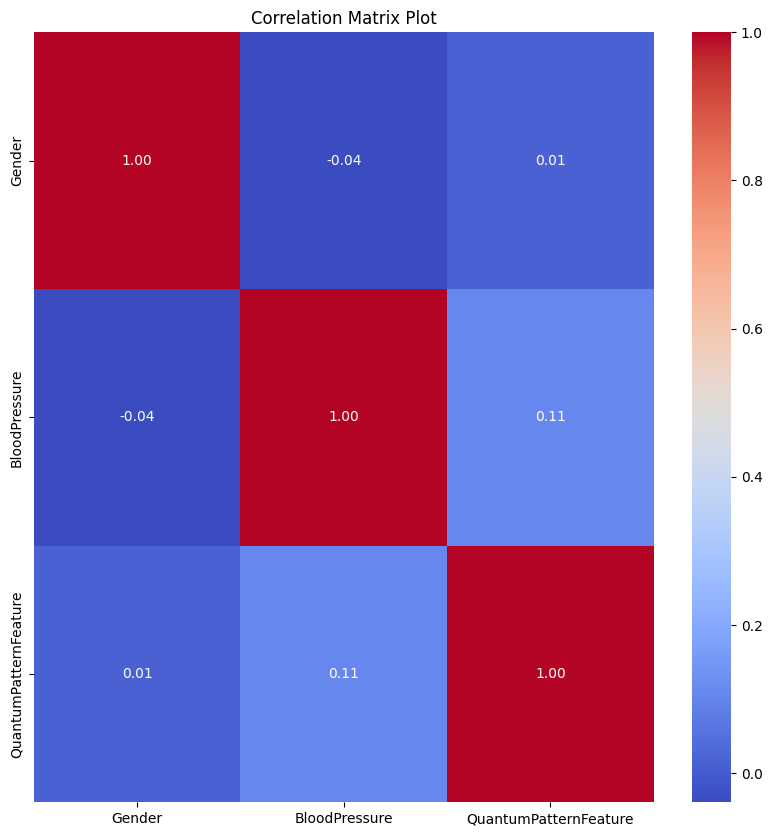

In [20]:
selected_features_df = X[selected_features]
plt.figure(figsize=(10, 10))

sns.heatmap(selected_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Plot")
plt.show()

# Bottom Up

# KNN Model

In [21]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 k = 1 Accuracy: 0.7800
 k = 2 Accuracy: 0.8000
 k = 3 Accuracy: 0.8400
 k = 4 Accuracy: 0.8267
 k = 5 Accuracy: 0.8400

Best k: 3 accuracy: 0.84


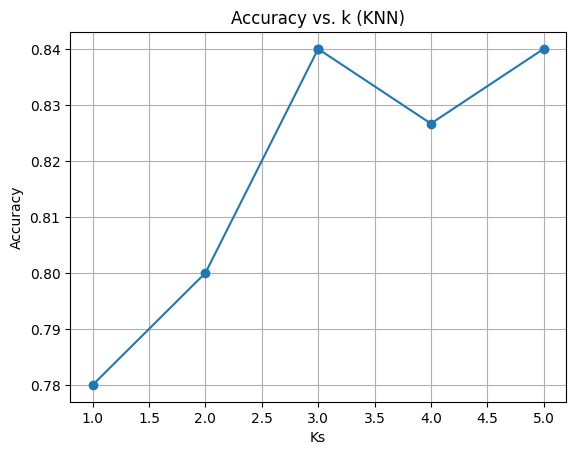

In [24]:
accuracy_scores = []
k_range = range(1, len(X_train.columns))

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accurate = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accurate)
    print(f" k = {k} Accuracy: {accurate:.4f}")

best_accuracy = max(accuracy_scores)
best_k = k_range[accuracy_scores.index(best_accuracy)]
print(f"\nBest k: {best_k} accuracy: {best_accuracy}")

plt.plot(list(k_range), accuracy_scores, marker='o')
plt.scatter(best_k, max(accuracy_scores), color='blue', label=f'Best k = {best_k}')
plt.xlabel("Ks")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k (KNN)")
plt.grid(True)
plt.show()


In [28]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
train_preds = best_knn.predict(X_train_scaled)
test_preds = best_knn.predict(X_test_scaled)

In [31]:
print("\nEvaluation of Training Data:")
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds, average='binary')
train_recall = recall_score(y_train, train_preds, average='binary')
train_f1 = f1_score(y_train, train_preds, average='binary')

print(f"Accuracy:  {train_accuracy:.5f}")
print(f"Precision: {train_precision:.5f}")
print(f"Recall:    {train_recall:.5f}")
print(f"F1-Score:  {train_f1:.5f}")

# Evaluation on Test Data
print("\nEvaluation of Test Data:")
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds, average='binary')
test_recall = recall_score(y_test, test_preds, average='binary')
test_f1 = f1_score(y_test, test_preds, average='binary')

print(f"Accuracy:  {test_accuracy:.5f}")
print(f"Precision: {test_precision:.5f}")
print(f"Recall:    {test_recall:.5f}")
print(f"F1-Score:  {test_f1:.5f}")


Evaluation of Training Data:
Accuracy:  0.94000
Precision: 0.93519
Recall:    0.96651
F1-Score:  0.95059

Evaluation of Test Data:
Accuracy:  0.84000
Precision: 0.87640
Recall:    0.85714
F1-Score:  0.86667


<ipython-input-32-953733207>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='Greens_d')


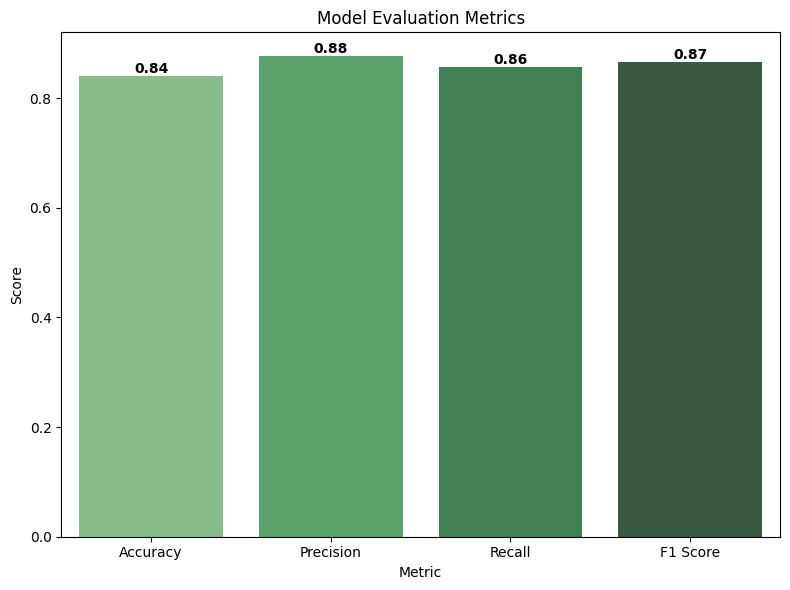

In [32]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [test_accuracy, test_precision, test_recall, test_f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='Greens_d')

for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

# **ML Flow**

In [43]:
mlflow.set_experiment("Classification Using KNN with MLflow")
mlflow.start_run(run_name = "Heart Disease Classification")

<ActiveRun: >

In [44]:
mlflow.log_param("n_neighbors", best_k)
mlflow.sklearn.log_model(best_knn, "trained_knn_model")

2025/06/14 12:14:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/14 12:14:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [45]:
mlflow.log_metric("accuracy", test_accuracy)
mlflow.log_metric("precision", test_precision)
mlflow.log_metric("recall", test_recall)
mlflow.log_metric("f1_score", test_f1)

In [46]:
logged_model= f"runs:/{mlflow.active_run().info.run_id}/trained_knn_model"
mlflow_loaded_model = mlflow.sklearn.load_model(logged_model)

In [47]:
mlflow_predictions = mlflow_loaded_model.predict(X_test_scaled)

mlflow_accuracy = accuracy_score(y_test, mlflow_predictions)
print(f"Accuracy from MLflow-loaded model: {mlflow_accuracy}")

Accuracy from MLflow-loaded model: 0.84


In [48]:
scaled_new_input = scaler.transform(X_test_scaled)

new_prediction = mlflow_loaded_model.predict(scaled_new_input)
print("Prediction for new patient:", new_prediction[0])

Prediction for new patient: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
joblib.dump(best_knn, "knn_model.pkl")

['knn_model.pkl']

In [50]:
mlflow.log_artifact("knn_model.pkl")
print("Model logged to MLflow!")

Model logged to MLflow!


In [51]:
mlflow.end_run()